# Exploratory Data Analysis (EDA) for Customer Satisfaction Prediction

In this notebook, we perform exploratory data analysis (EDA) on the preprocessed dataset.
The EDA process aims to identify patterns, understand data distribution, and uncover insights related to customer satisfaction, delivery times, and other influencing factors.

## Import Libraries
We begin by importing the necessary libraries required for the analysis.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Functions to Support EDA

We define functions for loading the data, creating directories for saving results, and performing the EDA.

In [2]:
def create_directories(dataset_type):
    """
    Create directories to save EDA results for the selected dataset type.
    """
    base_dir = f'EDA_Results/{dataset_type}'
    plots_dir = os.path.join(base_dir, 'plots')
    analysis_dir = os.path.join(base_dir, 'analysis')
    os.makedirs(plots_dir, exist_ok=True)
    os.makedirs(analysis_dir, exist_ok=True)
    
    return base_dir, plots_dir, analysis_dir


def load_data(dataset_type):
    """
    Load preprocessed data based on the dataset type.
    """
    base_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'Datasets'))
    if dataset_type == "delivery":
        file_path = os.path.join(base_dir, "Original_Datasets", "Zomato Dataset.csv")
    elif dataset_type == "restaurant":
        file_path = file_path = os.path.join(base_dir, "Original_Datasets", "zomato.csv")
    else:
        raise ValueError("Invalid dataset type. Choose 'delivery' or 'restaurant'.")
    
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File {file_path} does not exist. Please run the preprocessing script first.")
    
    data_df = pd.read_csv(file_path)
    return data_df

In [3]:
print("Select Dataset Type:")
print("1. Delivery Dataset")
print("2. Restaurant Dataset")
choice = input("Enter your choice (1/2): ").strip()

if choice == "1":
    dataset_type = "delivery"
elif choice == "2":
    dataset_type = "restaurant"
else:
    print("Invalid choice. Please select 1 or 2.")
    raise ValueError("Invalid dataset type. Type '1' or '2'.")

# Create output directories
base_dir, plots_dir, analysis_dir = create_directories(dataset_type)

# Load the selected dataset
data_df = load_data(dataset_type)
print(f"\n{dataset_type} dataset loaded successfully!")
print(f"- The outputs below are for the {dataset_type} dataset only.")
print("- If you wish to get the outputs for the other dataset only, then run this cell again.")

Select Dataset Type:
1. Delivery Dataset
2. Restaurant Dataset

delivery dataset loaded successfully!
- The outputs below are for the delivery dataset only.
- If you wish to get the outputs for the other dataset only, then run this cell again.


# Steps in EDA:
Next, we perform the exploratory data analysis to gain insights into the dataset.

---
### 1. Display First Few Rows
We start by displaying the first few rows of the dataset to get an initial sense of the data.

In [4]:
# Display first few rows
print(f"First 5 rows of the {dataset_type} dataset:")
display(data_df.head())

First 5 rows of the delivery dataset:


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


### 2. Descriptive Statistics
We will view the descriptive statistics of the dataset to summarize the data.

In [5]:
print(f"\nDescriptive Statistics for {dataset_type} dataset:")
display(data_df.describe())


Descriptive Statistics for delivery dataset:


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


### 3. Check for Missing Values
Next, we check for missing values in the dataset to identify if any data needs to be cleaned or imputed.

In [6]:
print(f"\nMissing Values in {dataset_type} dataset:")
missing_values = data_df.isnull().sum()
display(missing_values) 


Missing Values in delivery dataset:


ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

### 4. Correlation Matrix
We compute the correlation matrix for the numeric columns to identify relationships between variables.

In [7]:
# Select only numeric columns for correlation
numeric_cols = data_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns for correlation in {dataset_type} dataset:")
display(numeric_cols)


Numeric columns for correlation in delivery dataset:


['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)']

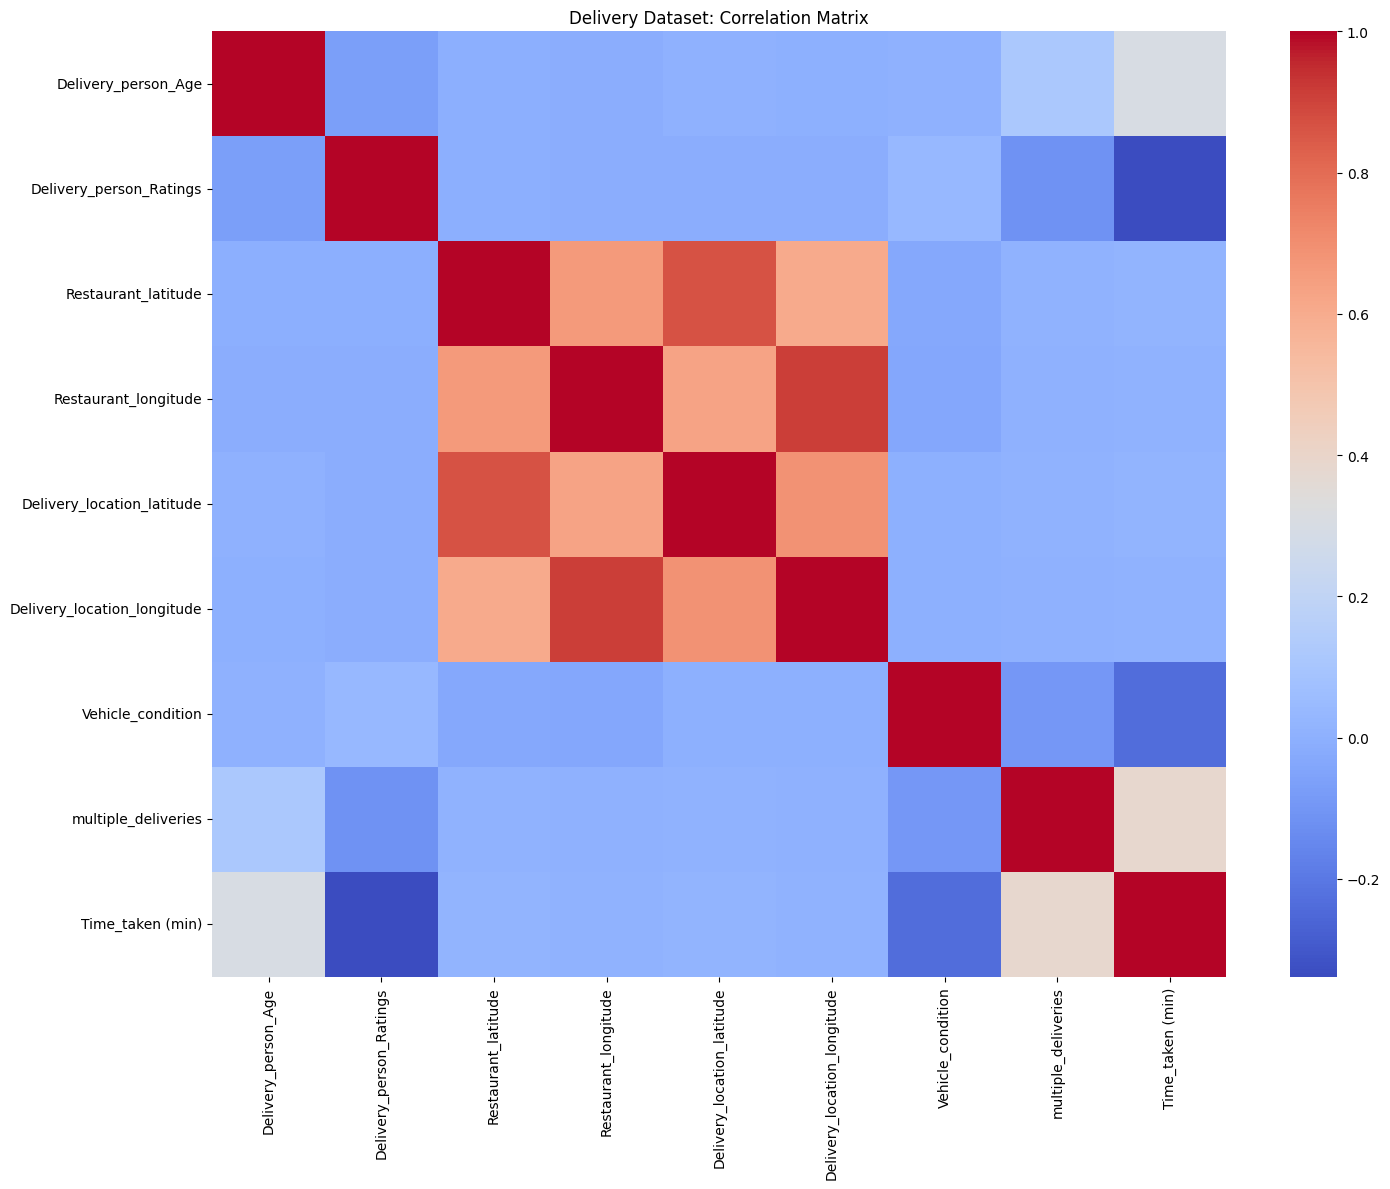

In [8]:
# Generate and display correlation matrix
corr_matrix = data_df[numeric_cols].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title(f'{dataset_type.capitalize()} Dataset: Correlation Matrix')
plt.tight_layout()
# plt.savefig(os.path.join(plots_dir, "correlation_matrix.png"))
plt.show()

# EDA Specific to Delivery Dataset

This section includes EDA steps tailored for the **delivery** dataset, such as visualizing delivery times and relationships between delivery ratings and time taken.
1. **Distribution of Time Taken:** A histogram and kernel density estimate (KDE) plot to visualize the distribution of delivery times.
2. **Delivery Person Ratings vs. Time Taken:** We visualize the relationship between delivery person ratings and delivery time with customer satisfaction.

In [10]:
def eda_for_delivery(data_df, plots_dir):
    """
    Perform EDA specific to the Delivery dataset.
    """
    print("\nPerforming EDA for Delivery dataset...")

    # Distribution of Time Taken
    plt.figure(figsize=(8, 6))
    sns.histplot(data_df['Time_taken (min)'], bins=30, kde=True)
    plt.title('Distribution of Delivery Time')
    plt.xlabel('Time Taken (min)')
    plt.ylabel('Frequency')
    # plt.savefig(os.path.join(plots_dir, "time_taken_distribution.png"))
    plt.show()

    # Boxplot of Delivery Person Ratings vs. Time Taken
    if 'Delivery_person_Ratings' in data_df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Delivery_person_Ratings', y='Time_taken (min)', data=data_df)
        plt.title('Ratings vs. Time Taken')
        plt.xlabel('Delivery Person Ratings')
        plt.ylabel('Time Taken (min)')
        # plt.savefig(os.path.join(plots_dir, "ratings_vs_time_taken.png"))
        plt.show()

## EDA Specific to Restaurant Dataset

This section includes EDA steps tailored for the **restaurant** dataset, such as visualizing delivery times and relationships between delivery ratings and time taken.
1. **Distribution of Ratings:**
2. **Boxplot of Average Cost vs. Ratings:**
3. **Countplot of Online Order Preference:**

In [11]:
def eda_for_restaurant(data_df, plots_dir):
    """
    Perform EDA specific to the Restaurant dataset.
    """
    print("\nPerforming EDA for Restaurant dataset...")

    # Distribution of Ratings
    plt.figure(figsize=(8, 6))
    sns.histplot(data_df['rate (out of 5)'], bins=30, kde=True)
    plt.title('Distribution of Ratings')
    plt.xlabel('Ratings')
    plt.ylabel('Frequency')
    # plt.savefig(os.path.join(plots_dir, "ratings_distribution.png"))
    plt.show()

    # Boxplot of Average Cost vs. Ratings
    if 'avg cost (two people)' in data_df.columns and 'rate (out of 5)' in data_df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='rate (out of 5)', y='avg cost (two people)', data=data_df)
        plt.title('Average Cost vs. Ratings')
        plt.xlabel('Ratings')
        plt.ylabel('Average Cost (for Two People)')
        # plt.savefig(os.path.join(plots_dir, "cost_vs_ratings.png"))
        plt.show()

    # Countplot of Online Order Preference
    if 'online_order' in data_df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x='online_order', data=data_df)
        plt.title('Online Order Preference')
        plt.xlabel('Online Order')
        plt.ylabel('Count')
        # plt.savefig(os.path.join(plots_dir, "online_order_preference.png"))
        plt.show()

# Perform specific EDA for the chosen dataset


Performing EDA for Delivery dataset...


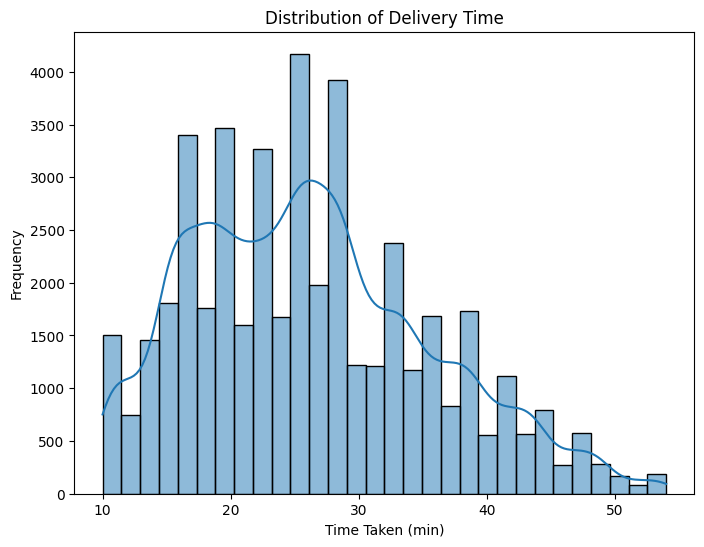

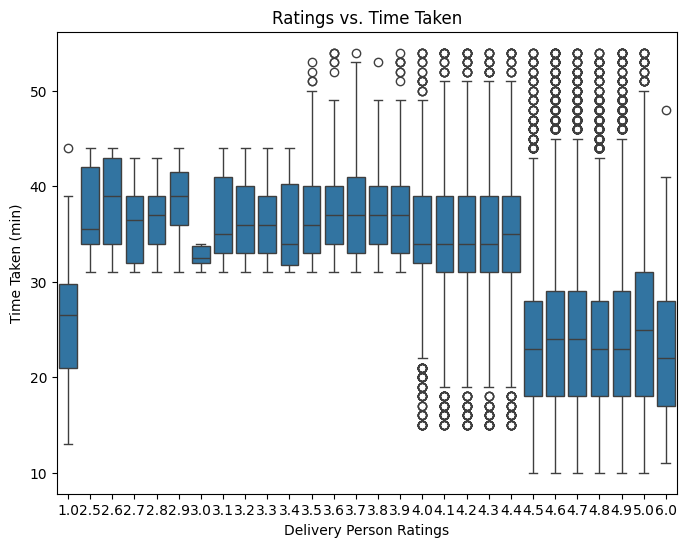

In [12]:
if dataset_type == "delivery":
    eda_for_delivery(data_df, plots_dir)
elif dataset_type == "restaurant":
    eda_for_restaurant(data_df, plots_dir)
else:
    print("Invalid dataset type for specific EDA.")